# Delta Band PFC Analysis

**Delta Band**: In neuroscience and electroencephalography (EEG), brain activity is categorized into different frequency bands based on the oscillation patterns of electrical activity in the brain. The delta band typically ranges from 0.5 to 4 Hertz (Hz) or cycles per second. Delta activity is characterized by slow, high-amplitude oscillations and is commonly associated with deep sleep and unconsciousness.

**PFC (Prefrontal Cortex)**: The prefrontal cortex is a region of the brain located at the front of the frontal lobe. It is involved in higher-order cognitive functions such as executive function, decision-making, working memory, and goal setting. The PFC plays a crucial role in regulating and orchestrating various cognitive processes.

## Load Delta Band PFC Data

In [1]:
from scipy.io import loadmat
delta_band_pfc = loadmat('synthesised-features/delta_band_pfc.mat')

In [2]:
delta_band_pfc.keys()

dict_keys(['__header__', '__version__', '__globals__', 'DeltaBand'])

In [3]:
delta_band_pfc['DeltaBand']['data'];

In [4]:
delta_band_pfc['DeltaBand']['spec'];

In [5]:
delta_band_pfc['DeltaBand']['timestamps'];

In [6]:
delta_band_pfc['DeltaBand']['freqs'];

## Load DataFrame

In [7]:
import numpy as np
import pandas as pd

In [8]:
data = delta_band_pfc['DeltaBand']['data']
timesteps = delta_band_pfc['DeltaBand']['timestamps']
frequencies = delta_band_pfc['DeltaBand']['freqs']

In [9]:
flat_data = np.concatenate(data.all())
df = pd.DataFrame({'DeltaBandPFC': flat_data})

In [10]:
df['Timestep'] = range(1, len(timesteps.all()) + 1)
df.set_index('Timestep', inplace=True)

## Plot Timeseries

In [11]:
import matplotlib.pyplot as plt

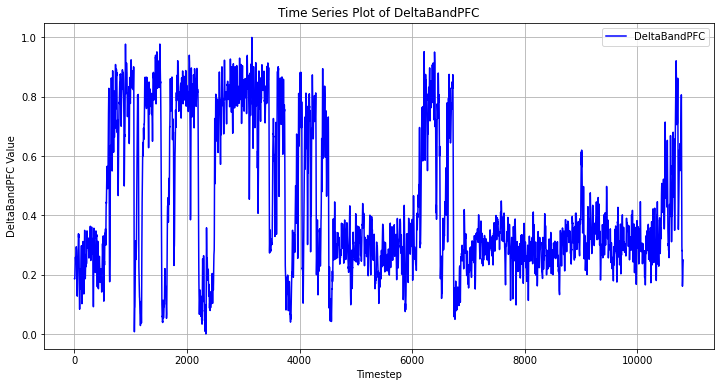

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['DeltaBandPFC'], label='DeltaBandPFC', color='blue')
plt.title('Time Series Plot of DeltaBandPFC')
plt.xlabel('Timestep')
plt.ylabel('DeltaBandPFC Value')
plt.legend()
plt.grid(True)
plt.show()

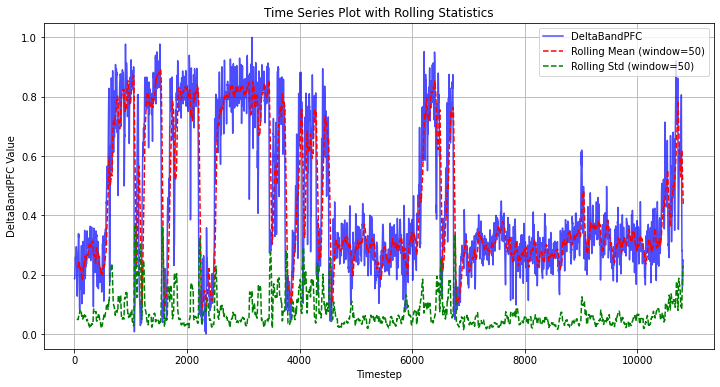

In [14]:
plt.figure(figsize=(12, 6))

# Plot the original signal
plt.plot(df.index, df['DeltaBandPFC'], label='DeltaBandPFC', color='blue', alpha=0.7)

# Plot rolling mean (smoothed signal) to visualize trends
rolling_mean = df['DeltaBandPFC'].rolling(window=50).mean()
plt.plot(df.index, rolling_mean, label='Rolling Mean (window=50)', color='red', linestyle='--')

# Plot rolling standard deviation to visualize volatility
rolling_std = df['DeltaBandPFC'].rolling(window=50).std()
plt.plot(df.index, rolling_std, label='Rolling Std (window=50)', color='green', linestyle='--')

plt.title('Time Series Plot with Rolling Statistics')
plt.xlabel('Timestep')
plt.ylabel('DeltaBandPFC Value')
plt.legend()
plt.grid(True)

# plt.savefig('time_series_plot.png')

plt.show()